# CS440/ECE448 Spring 2024
# MP01: Probability

The first thing you need to do is to download this file: <a href="mp01.zip">mp01.zip</a>.  It has the following content:

* `submitted.py`: Your homework. Edit, and then submit to <a href="https://www.gradescope.com/courses/486387">Gradescope</a>.
* `mp01_notebook.ipynb`: This is a <a href="https://anaconda.org/anaconda/jupyter">Jupyter</a> notebook to help you debug.  You can completely ignore it if you want, although you might find that it gives you useful instructions.
* `grade.py`: Once your homework seems to be working, you can test it by typing `python grade.py`, which will run the tests in `tests/tests_visible.py`.
* `tests/test_visible.py`: This file contains about half of the <a href="https://docs.python.org/3/library/unittest.html">unit tests</a> that Gradescope will run in order to grade your homework.  If you can get a perfect score on these tests, then you should also get a perfect score on the additional hidden tests that Gradescope uses.
* `solution.json`: This file contains the solutions for the visible test cases, in <a href="https://docs.python.org/3/library/json.html">JSON</a> format.  If the instructions are confusing you, please look at this file, to see if it can help to clear up your confusion.
* `data`: This directory contains the data.
* `reader.py`: This is an auxiliary program that you can use to read the data.
* `requirements.txt`: This tells you which python packages you need to have installed, in order to run `grade.py`.  You can install all of those packages by typing `pip install -r requirements.txt` or `pip3 install -r requirements.txt`.

This file (`mp01_notebook.ipynb`) will walk you through the whole MP, giving you instructions and debugging tips as you go.

### Table of Contents

1. <a href="#section1">Reading the data</a>
1. <a href="#section2">Joint and Conditional Distributions</a>
1. <a href="#section3">Mean, Variance and Covariance</a>
1. <a href="#section4">Expected Value of a Function of an RV</a>
1. <a href="#grade">Grade Your Homework</a>

<a id='section1'></a>

## Reading the data

There are two types of data: visible data (provided to you), and hidden data (available only to the autograder on Gradescope).  If you get your code working for the visible data, it should also work for the hidden data.

The visible dataset consist of 500 emails, a subset of the <a href="https://www.kaggle.com/datasets/wanderfj/enron-spam">Enron-Spam dataset</a> provided by Ion Androutsopoulos. MP02 will use a larger portion of the same dataset.

In order to help you load the data, we provide you with a utility function called `reader.py`.  To use it, you will need to install nltk.  It should be possible for you to do this by running the following code block:

In [1]:
!pip install nltk

Most of the code we provide, and most of the template code that you need to fill in, will be documented using docstrings so you can find information about each function by using `help`:

In [2]:
import reader
help(reader)

Help on module reader:

NAME
    reader - This file is responsible for providing functions for reading the files

FUNCTIONS
    loadDir(dirname, stemming, lower_case, use_tqdm=True)
        Loads the files in the folder and returns a 
        list of lists of words from the text in each file.
        
        Parameters:
        name (str): the directory containing the data
        stemming (bool): if True, use NLTK's stemmer to remove suffixes
        lower_case (bool): if True, convert letters to lowercase
        use_tqdm (bool, default:True): if True, use tqdm to show status bar
        
        Output:
        texts (list of lists): texts[m][n] is the n'th word in the m'th email
        count (int): number of files loaded
    
    loadFile(filename, stemming, lower_case)
        Load a file, and returns a list of words.
        
        Parameters:
        filename (str): the directory containing the data
        stemming (bool): if True, use NLTK's stemmer to remove suffixes
    

Well, that's pretty straightforward.   Let's use it to load the `data` directory.

In [3]:
import importlib
importlib.reload(reader)
texts, count = reader.loadDir('data',False,False)

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:00<00:00, 1820.25it/s]


In [4]:
print("There were",count,"files loaded")

There were 500 files loaded


In [5]:
print("The first file contained the following words:",texts[0])

The first file contained the following words: ['Subject', 'done', 'new', 'sitara', 'desk', 'request', 'ref', 'cc', '20000813', 'carey', 'per', 'scott', 's', 'request', 'below', 'the', 'following', 'business', 'unit', 'aka', 'desk', 'id', 'portfolio', 'was', 'added', 'to', 'global', 'production', 'and', 'unify', 'development', 'test', 'production', 'and', 'stage', 'please', 'copy', 'to', 'the', 'other', 'global', 'environments', 'thanks', 'dick', 'x', '3', '1489', 'updated', 'in', 'global', 'production', 'environment', 'gcc', 'code', 'desc', 'p', 'ent', 'subenti', 'data', '_', 'cd', 'ap', 'data', '_', 'desc', 'code', '_', 'id', 'a', 'sit', 'deskid', 'imcl', 'a', 'ena', 'im', 'cleburne', '9273', 'from', 'scott', 'mills', '08', '30', '2000', '08', '27', 'am', 'to', 'samuel', 'schott', 'hou', 'ect', 'ect', 'richard', 'elwood', 'hou', 'ect', 'ect', 'debbie', 'r', 'brackett', 'hou', 'ect', 'ect', 'judy', 'rose', 'hou', 'ect', 'ect', 'vanessa', 'schulte', 'corp', 'enron', 'enron', 'david', 'b

<a id='section2'></a>

## Joint, Conditional, and Marginal Distributions

In this week's MP, we will work with the following two random variables:

* $X_1=$ the number of times that word1 occurs in a text
* $X_2=$ the number of times that word2 occurs in a text

... where you can specify word1 and word2 as parameters of the function.  In this section, we will compute the joint, conditional, and marginal distributions of $X_1$ and $X_2$.  These will be estimated, from the available data, using the following formulas, where $N(X_1=x_1,X_2=x_2)$ is the number of texts in the dataset that contain $x_1$ instances of word1, and $x_2$ instances of word2:

#### Joint distribution:

$$P(X_1=x_1,X_2=x_2)=\frac{N(X_1=x_1,X_2=x_2)}{\sum_{x_1}\sum_{x_2} N(X_1=x_1,X_2=x_2)}$$

#### Marginal distributions:

$$P(X_1=x_1)=\sum_{x_2} P(X_1=x_1,X_2=x_2)$$
$$P(X_2=x_2)=\sum_{x_1} P(X_1=x_1,X_2=x_2)$$

#### Conditional distribution:

$$P(X_2=x_2|X_1=x_1)=\frac{P(X_1=x_1,X_2=x_2)}{P(X_1=x_1)}$$



At this point, we'll load the file `submitted.py`.

The file `submitted.py` is the only part of your work that the autograder will see. The only purpose of this notebook is to help you debug `submitted.py`.  Once you have revised `submitted.py` enough to make this notebook work, then you should go to the command line, and type `python grade.py`.  Once that command returns without errors, then  you can go ahead and submit your file `submitted.py` to the autograder.  You can submit to the autograder as often as you want, but it will save you trouble if you debug as much as you can on your local machine, before you submit to the autograder.

We will use `importlib` in order to reload your `submitted.py` over and over again.  That way, every time you make a modification in `submitted.py`, you can just re-run  the corresponding block of this notebook, and it will reload `submitted.py` with your modified code.  

Since the file is called `submitted.py`, python considers it to contain a module called `submitted`.  As shown, you can read the module's docstring by printing `submitted.__doc__`.  You can also type `help(submitted)` to get a lot of information about the module, including its docstring, a list of all the functions it defines, and all of their docstrings.  For  more about docstrings, see, for example, https://www.python.org/dev/peps/pep-0257/.

In [6]:
import submitted
import importlib
importlib.reload(submitted)
print(submitted.__doc__)


This is the module you'll submit to the autograder.

There are several function definitions, here, that raise RuntimeErrors.  You should replace
each "raise RuntimeError" line with a line that performs the function specified in the
function's docstring.



Now it's time for you to open `submitted.py`, and start editing it.  You can open it in another Jupyter window by choosing "Open from Path" from the "File" menu, and then typing `submitted.py`.  Alternatively, you can use any text editor.

Once you have it open, try editing the function `marginal_distribution_of_word_counts` so that its functionality matches its docstring.  Here is what it's docstring says:

In [7]:
help(submitted.marginal_distribution_of_word_counts)

Help on function marginal_distribution_of_word_counts in module submitted:

marginal_distribution_of_word_counts(texts, word0)
    Parameters:
    texts (list of lists) - a list of texts; each text is a list of words
    word0 (str) - the word that you want to count
    
    Output:
    Pmarginal (numpy array of length cX0) - Pmarginal[x0] = P(X0=x0), where
      X0 is the number of times that word0 occurs in a document
      cX0-1 is the largest value of X0 observed in the provided texts



Edit `marginal_distribution_of_word_counts` so that it does the task specified in its docstring.  When you get the code working, you can count the number of times that the word "company" occurs in any given document once, twice, thrice, etc.  It turns out that only 2.4% of texts contain the word "company" just once, 0.2% contain it twice, 0.2% contain it four times; 97.2% don't contain it at all.

In [8]:
importlib.reload(submitted)
Pmarginal = submitted.marginal_distribution_of_word_counts(texts, 'company')
print(Pmarginal)

[0.972 0.024 0.002 0.    0.002]


Now, edit the function `conditional_distribution_of_word_counts`.

In [9]:
importlib.reload(submitted)
help(submitted.conditional_distribution_of_word_counts)

Help on function conditional_distribution_of_word_counts in module submitted:

conditional_distribution_of_word_counts(texts, word0, word1)
    Parameters:
    texts (list of lists) - a list of texts; each text is a list of words
    word0 (str) - the first word that you want to count
    word1 (str) - the second word that you want to count
    
    Outputs: 
    Pcond (numpy array, shape=(cX0,cX1)) - Pcond[x0,x1] = P(X1=x1|X0=x0), where
      X0 is the number of times that word0 occurs in a document
      cX0-1 is the largest value of X0 observed in the provided texts
      X1 is the number of times that word1 occurs in a document
      cX1-1 is the largest value of X0 observed in the provided texts
      CAUTION: If P(X0=x0) is zero, then P(X1=x1|X0=x0) should be np.nan.



Notice that, according to the definition of conditional probability, any probability conditioned on the event $X_0=3$ is undefined, because $P(X_0=3)=0$.  In such cases, your code should return a value of `np.nan`.

In [10]:
importlib.reload(submitted)
Pcond = submitted.conditional_distribution_of_word_counts(texts, "company", "sales")
print(Pcond)

[[0.97942387 0.01234568 0.00617284 0.00205761]
 [0.83333333 0.16666667 0.         0.        ]
 [1.         0.         0.         0.        ]
 [       nan        nan        nan        nan]
 [1.         0.         0.         0.        ]]


Finally, consider the function `joint_distribution_of_word_counts`, which uses the marginal and conditional probability tables as inputs:

In [11]:
importlib.reload(submitted)
help(submitted.joint_distribution_of_word_counts)

Help on function joint_distribution_of_word_counts in module submitted:

joint_distribution_of_word_counts(Pmarginal, Pcond)
    Parameters:
    Pmarginal (numpy array of length cX0) - Pmarginal[x0] = P(X0=x0), where
    Pcond (numpy array, shape=(cX0,cX1)) - Pcond[x0,x1] = P(X1=x1|X0=x0)
    
    Output:
    Pjoint (numpy array, shape=(cX0,cX1)) - Pjoint[x0,x1] = P(X0=x0, X1=x1)
      X0 is the number of times that word0 occurs in a given text,
      X1 is the number of times that word1 occurs in the same text.
      CAUTION: if P(X0=x0) then P(X0=x0,X1=x1)=0, even if P(X1=x1|X0=x0)=np.nan.



In [12]:
importlib.reload(submitted)
Pjoint = submitted.joint_distribution_of_word_counts(Pmarginal,Pcond)
print(Pjoint)

[[0.952 0.012 0.006 0.002]
 [0.02  0.004 0.    0.   ]
 [0.002 0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.002 0.    0.    0.   ]]


<a id='section3'></a>

## Mean Vector and Covariance Matrix

In order to study mean, variance and covariance, let's first find the joint distribution of some pair of words that occur more frequently.  How about "a" and "the"?  Amazingly, as the following code shows, there is a small nonzero probability that "a" occurs 19 times, and "the" occurs 58 times, in the same text!


In [13]:
importlib.reload(submitted)
Pa = submitted.marginal_distribution_of_word_counts(texts, 'a')
Pthe_given_a = submitted.conditional_distribution_of_word_counts(texts, 'a', 'the')
Pa_the = submitted.joint_distribution_of_word_counts(Pa, Pthe_given_a)

print("Here is the joint distribution:")
print(Pa_the)
print("\n It has size", Pa_the.shape)

Here is the joint distribution:
[[0.248 0.078 0.056 ... 0.    0.    0.   ]
 [0.036 0.028 0.026 ... 0.    0.    0.   ]
 [0.006 0.006 0.014 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.002]]

 It has size (20, 59)


We can plot this distribution as a 2d plot using matplotlib.  First, make sure you have matplotlib installed:

In [14]:
!pip install matplotlib

In [15]:
cX0, cX1 = Pa_the.shape
x, y = np.meshgrid(np.arange(cX0), np.arange(cX1))
base = np.zeros((cX0, cX1))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x.ravel(), y.ravel(), base.ravel(), 1, 1, Pa_the.ravel(), shade=True)
ax.set_title("Counts of the word /the/ have the following probability mass function:")
ax.set_xlabel("$x_0=$ frequency of /a/")
ax.set_ylabel("$x_1=$ frequency of /the/")
ax.set_zlabel("$P(X_0=x_0,X_1=x_1)$")

NameError: name 'np' is not defined

It looks like the mean vector will be pretty close to $\mu=[0,0]$.  Let's find out.

In [ ]:
importlib.reload(submitted)
help(submitted.mean_vector)

Help on function mean_vector in module submitted:

mean_vector(Pjoint)
    Parameters:
    Pjoint (numpy array, shape=(cX0,cX1)) - Pjoint[x0,x1] = P(X0=x0, X1=x1)
    
    Outputs:
    mu (numpy array, length 2) - the mean of the vector [X0, X1]



In [16]:
importlib.reload(submitted)
mu = submitted.mean_vector(Pa_the)
print(mu)

[1.364 4.432]


That's a bit of a surprise - the mean of $X_1$ is higher than the mean of $X_0$!  That result wasn't obvious in the figure, unless you noticed that the maximum value of $X_1$ is 58, while the maximum value of $X_0$ is only 19.  

Now let's try to find the matrix of variances and covariances.

In [23]:
importlib.reload(submitted)
help(submitted.covariance_matrix)

Help on function covariance_matrix in module submitted:

covariance_matrix(Pjoint, mu)
    Parameters:
    Pjoint (numpy array, shape=(cX0,cX1)) - Pjoint[x0,x1] = P(X0=x0, X1=x1)
    mu (numpy array, length 2) - the mean of the vector [X0, X1]
    
    Outputs:
    Sigma (numpy array, shape=(2,2)) - matrix of variance and covariances of [X0,X1]



In [26]:
importlib.reload(submitted)
Sigma = submitted.covariance_matrix(Pa_the, mu)
print(Sigma)

[[ 4.891504  9.244752]
 [ 9.244752 41.601376]]


A few things to notice:

* The variance of $X_1$ is larger than the variance of $X_0$.  This is because $X_1$ varies over a larger range than $X_0$, with nonzero probabilities all the way.
* The covariance of $X_0$ and $X_1$ is positive, meaning that a large value of $X_0$ tends to co-occur with a large value of $X_1$.  Probably, this just means that long texts have larger counts of both the words `a` and `the`.

<a id='section4'></a>

## A Function of Random Variables is a Random Variable

Finally, let's calculate a new random variable by taking a function of the random variables $X_0$ and $X_1$.  Any function of random variables is a random variable, and its distribution is

$$P(f(X_0,X_1)=z)=\sum_{x_0,x_1:f(x_0,x_1)=z} P(X_0=x_0,X_1=x_1)$$

Let's read the docstring:

In [27]:
importlib.reload(submitted)
help(submitted.distribution_of_a_function)

Help on function distribution_of_a_function in module submitted:

distribution_of_a_function(Pjoint, f)
    Parameters:
    Pjoint (numpy array, shape=(cX0,cX1)) - Pjoint[x0,x1] = P(X0=x0, X1=x1)
    f (function) - f should be a function that takes two
       real-valued inputs, x0 and x1.  The output, z=f(x0,x1),
       may be any hashable value (number, string, or even a tuple).
    
    Output:
    Pfunc (Counter) - Pfunc[z] = P(Z=z)
       Pfunc should be a collections.defaultdict or collections.Counter, 
       so that previously unobserved values of z have a default setting
       of Pfunc[z]=0.



You can read about defaultdict and Counter data types `here <https://docs.python.org/3/library/collections.html>`_.  Basically, they are just dictionaries with a default value for any previously unseen keys.

Let's create a new random variable whose value is a string, rather than being a number.  Here is the function:

In [29]:
def f(x0,x1):
    if x0<1 and x1 < 1:
        return "Zero"
    elif x0 < 2 and x1 < 2:
        return "Small"
    else:
        return "Big"

print("f(0,0)=",f(0,0))
print("f(0,15)=",f(0,15))
print("f(1,1)=",f(1,1))
print("f(19,58)=",f(19,58))

f(0,0)= Zero
f(0,15)= Big
f(1,1)= Small
f(19,58)= Big


In [30]:
importlib.reload(submitted)
Pz = submitted.distribution_of_a_function(Pa_the, f)
print(Pz)

Counter({'Big': 0.6100000000000003, 'Zero': 0.24799999999999997, 'Small': 0.142})


As you can see, the random variable $f(X_0,X_1)$ has a 24.8% probability of being the string "Zero", a 14.2% probability of being the string "Small", and a 61% probability of being the string "Big".  Let's plot this probability mass function.

Text(0.5, 1.0, 'Probability Mass Function of a Function of Two Random Variables')

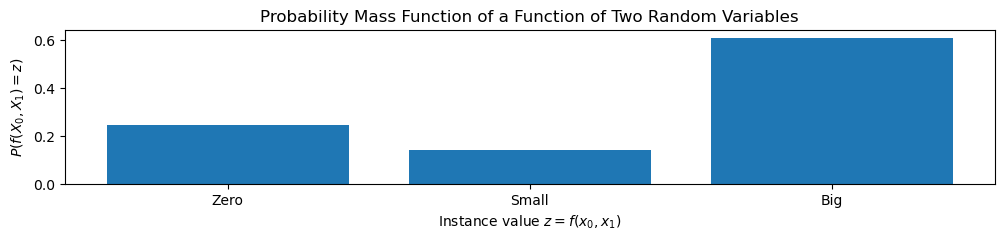

In [ ]:
import matplotlib.pyplot
fig = plt.figure(figsize=(12,2))
ax = fig.add_subplot(111)
Zvals = ['Zero','Small','Big']
ax.bar(np.arange(3), [Pz[z] for z in Zvals], tick_label=Zvals)
ax.set_xlabel('Instance value $z=f(x_0,x_1)$')
ax.set_ylabel('$P(f(X_0,X_1)=z)$')
ax.set_title('Probability Mass Function of a Function of Two Random Variables')

<a id='grade'></a>

## Grade your homework

If you've reached this point, and all of the above sections work, then you're ready to try grading your homework!  Before you submit it to Gradescope, try grading it on your own machine.  This will run some visible test cases (which you can read in `tests/test_visible.py`), and compare the results to the solutions (which you can read in `solution.json`).

The exclamation point (!) tells python to run the following as a shell command.  Obviously you don't need to run the code this way -- this usage is here just to remind you that you can also, if you wish, run this command in a terminal window.

In [31]:
!python grade.py

E......
ERROR: test_extra (test_extra.TestStep)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "c:\Users\Azain\Documents\College\Spring 2024\ECE 448\mp01\tests\test_extra.py", line 16, in test_extra
    hyp_p, hyp = extra.estimate_geometric(Pa)
  File "c:\Users\Azain\Documents\College\Spring 2024\ECE 448\mp01\extra.py", line 13, in estimate_geometric
    raise RuntimeError("You need to write this")
RuntimeError: You need to write this

----------------------------------------------------------------------
Ran 7 tests in 0.521s

FAILED (errors=1)


If your code is working, then as shown above, the only error you get should be from the extra credit part (`test_extra.py`).

If you got any other 'E' marks, it means that your code generated some runtime errors, and you need to debug those.

If you got any 'F' marks, it means that your code ran without errors, but that it generated results that are different from the solutions in `solutions.json`.  Try debugging those differences.

If neither of those things happened, and your result was a series of dots except for the one error associated with `test_extra.py`, then your code works perfectly.  

If you're not sure, you can try running grade.py with the -j option.  This will produce a JSON results file, in which you should get a score of 50%.

In [ ]:
!python grade.py -j

{
    "tests": [
        {
            "name": "test_extra (test_extra.TestStep)",
            "score": 0.0,
            "max_score": 5,
            "status": "failed",
            "output": "Test Failed: You need to write this\n"
        },
        {
            "name": "test_cond (test_visible.TestStep)",
            "score": 8,
            "max_score": 8,
            "status": "passed"
        },
        {
            "name": "test_covariance (test_visible.TestStep)",
            "score": 8,
            "max_score": 8,
            "status": "passed"
        },
        {
            "name": "test_distribution_of_function (test_visible.TestStep)",
            "score": 8,
            "max_score": 8,
            "status": "passed"
        },
        {
            "name": "test_joint (test_visible.TestStep)",
            "score": 9,
            "max_score": 9,
            "status": "passed"
        },
        {
            "name": "test_marginal (test_visible.TestStep)",
            "sco

Now you should try uploading `submitted.py` to <a href="https://www.gradescope.com/courses/486387">Gradescope</a>.  

Gradescope will run the same visible tests that you just ran on your own machine, plus some additional hidden tests.  It's possible that your code passes all the visible tests, but fails the hidden tests.  If that happens, then it probably means that you hard-coded a number into your function definition, instead of using the input parameter that you were supposed to use.  Debug by running your function with a variety of different input parameters, and see if you can get it to respond correctly in all cases.

Once your code works perfectly on Gradescope, with no errors, then you are done with the MP.  Congratulations!

## Extra Credit

On many of the machine problems (not all), extra credit of up to 10% will be available for doing a problem that goes a little bit beyond the material we've covered in lecture.

On MP01, for extra credit, let's model the frequency of a word as a geometric random variable.  A geometric random variable, $Y$, is one whose pmf is given by $P(Y=y)=p(1-p)^y$ for all non-negative integer values of $y$, where $p$ is a parameter called the "success probability" or the "stopping probability."

In order to model an observed random variable ($X$) using a geometric random variable ($Y$), the easiest way to estimate the model is by calculating $E[X]$, then choosing the parameter $p$ so that $E[Y]=E[X]$.  The mean of a geometric random variable is $E[Y]=\frac{1-p}{p}$.

For extra credit, try estimating the parameter $p$ that matches the observed mean of a non-negative integer random variable.  The template code is in `extra.py`, which has just one function for you to complete, the function `estimate_geometric`:

In [38]:
import extra, importlib
importlib.reload(extra)
help(extra.estimate_geometric)

Help on function estimate_geometric in module extra:

estimate_geometric(PX)
    @param:
    PX (numpy array of length cX): PX[x] = P(X=x), the observed probability mass function
    
    @return:
    p (scalar): the parameter of a matching geometric random variable
    PY (numpy array of length cX): PY[x] = P(Y=y), the first cX values of the pmf of a
      geometric random variable such that E[Y]=E[X].



When you have the code working, you can test it by finding a geometric distribution model for the number of occurrences of the word "a": 

In [39]:
importlib.reload(extra)
p, PY = extra.estimate_geometric(Pa)

print('p=',p)
print('The first five entries in the model pmf are',PY[:5])



p= 0.4230118443316413
The first five entries in the model pmf are [0.492 0.202 0.128 0.068 0.036]


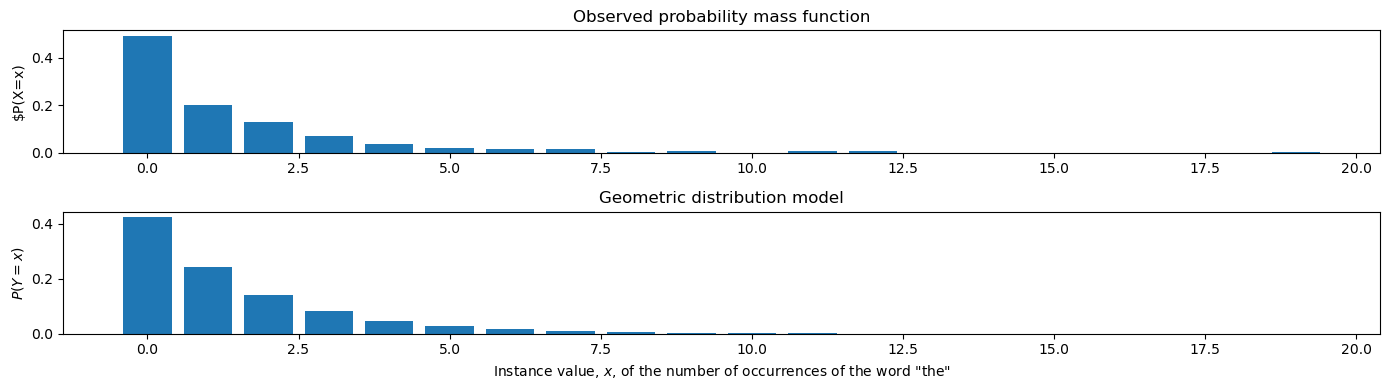

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,1,figsize=(14,4))
axs[0].bar(np.arange(len(Pa)), Pa)
axs[0].set_title('Observed probability mass function')
axs[0].set_ylabel('$P(X=x)')
axs[1].bar(np.arange(len(PY)), PY)
axs[1].set_title('Geometric distribution model')
axs[1].set_ylabel('$P(Y=x)$')
axs[1].set_xlabel('Instance value, $x$, of the number of occurrences of the word "the"')
fig.tight_layout()

You can test your extra credit by running `grade.py` again.

In [42]:
!python grade.py

.......
----------------------------------------------------------------------
Ran 7 tests in 0.356s

OK


When that works, try uploading your file `extra.py` to Gradescope, under the heading `MP01 Extra Credit`.